In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('dirty_v3_path.csv')
df


,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,54.0,Female,Healthy,86.35,127.68,28.30,94.36,1,218.60,152.82,4.85,0,0,9.15,10.35,0,3.65,8.71,ipsum,89.573837
29996,41.0,Male,Asthma,89.24,154.37,24.93,96.07,4,198.30,176.81,5.36,1,0,3.34,3.40,0,6.72,2.81,lorem,-5.864517
29997,83.0,Female,NaN,NaN,170.11,30.55,97.83,3,210.13,168.76,5.05,0,0,4.53,4.50,0,4.31,3.61,###,-30.934595
29998,41.0,Male,Diabetes,242.87,152.97,23.57,99.17,3,208.86,224.21,7.59,0,0,3.16,2.59,0,7.10,5.80,ipsum,5.085258


In [68]:
df.head()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
0,46.0,Male,Diabetes,137.04,135.27,28.90,96.04,6,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05,lorem,-137.057211
1,22.0,Male,Healthy,71.58,113.27,26.29,97.54,2,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72,ipsum,-11.230610
2,50.0,NaN,Asthma,95.24,NaN,22.53,90.31,2,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82,ipsum,98.331195
3,57.0,NaN,Obesity,NaN,130.53,38.47,96.60,5,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33,lorem,44.187175
4,66.0,Female,Hypertension,95.15,178.17,31.12,94.90,4,259.53,115.85,5.98,0,1,3.56,3.40,0,6.38,6.64,lorem,44.831426


In [69]:
df.tail()

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
29995,54.0,Female,Healthy,86.35,127.68,28.30,94.36,1,218.60,152.82,4.85,0,0,9.15,10.35,0,3.65,8.71,ipsum,89.573837
29996,41.0,Male,Asthma,89.24,154.37,24.93,96.07,4,198.30,176.81,5.36,1,0,3.34,3.40,0,6.72,2.81,lorem,-5.864517
29997,83.0,Female,NaN,NaN,170.11,30.55,97.83,3,210.13,168.76,5.05,0,0,4.53,4.50,0,4.31,3.61,###,-30.934595
29998,41.0,Male,Diabetes,242.87,152.97,23.57,99.17,3,208.86,224.21,7.59,0,0,3.16,2.59,0,7.10,5.80,ipsum,5.085258
29999,46.0,Female,Hypertension,86.52,159.26,34.55,96.60,4,217.37,141.28,5.77,1,0,4.91,5.82,1,3.64,5.47,lorem,-142.559559


In [70]:
df.describe(include='all')

,Age,Gender,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,LengthOfStay,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours,random_notes,noise_col
count,25500.000000,25500,25500,25500.000000,25500.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000,30000.000000
unique,NaN,2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,Female,Hypertension,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,###,NaN
freq,NaN,12865,7120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7575,NaN
mean,54.616784,NaN,NaN,123.622179,140.455337,28.476155,94.954992,4.414133,213.033891,176.837375,6.294377,0.279767,0.238533,3.803214,4.029654,0.439433,5.917312,6.229836,NaN,-0.517010
std,15.973618,NaN,NaN,41.576943,21.077933,5.728804,3.736202,2.761536,33.519757,48.812827,1.320269,0.448892,0.426194,2.011729,1.817165,0.496326,2.225057,1.187669,NaN,100.076959
min,10.000000,NaN,NaN,20.320000,74.240000,7.670000,67.510000,1.000000,95.730000,-22.480000,3.280000,0.000000,0.000000,-3.680000,-1.750000,0.000000,-2.440000,1.590000,NaN,-412.169596
25%,45.000000,NaN,NaN,96.280000,125.140000,24.590000,93.000000,3.000000,189.500000,141.280000,5.330000,0.000000,0.000000,2.350000,2.770000,0.000000,4.370000,5.410000,NaN,-68.270749
50%,55.000000,NaN,NaN,110.500000,138.320000,28.050000,95.300000,4.000000,211.835000,173.365000,5.970000,0.000000,0.000000,3.590000,3.790000,0.000000,5.900000,6.230000,NaN,-0.510742
75%,66.000000,NaN,NaN,136.610000,153.790000,31.810000,97.380000,5.000000,235.310000,208.630000,6.920000,1.000000,0.000000,5.060000,5.020000,1.000000,7.440000,7.050000,NaN,66.811399


In [71]:
df.dtypes

Age                  float64
Gender                object
Medical Condition     object
Glucose              float64
Blood Pressure       float64
BMI                  float64
Oxygen Saturation    float64
LengthOfStay           int64
Cholesterol          float64
Triglycerides        float64
HbA1c                float64
Smoking                int64
Alcohol                int64
Physical Activity    float64
Diet Score           float64
Family History         int64
Stress Level         float64
Sleep Hours          float64
random_notes          object
noise_col            float64
dtype: object

In [72]:
df.isna().sum()

Age                  4500
Gender               4500
Medical Condition    4500
Glucose              4500
Blood Pressure       4500
BMI                     0
Oxygen Saturation       0
LengthOfStay            0
Cholesterol             0
Triglycerides           0
HbA1c                   0
Smoking                 0
Alcohol                 0
Physical Activity       0
Diet Score              0
Family History          0
Stress Level            0
Sleep Hours             0
random_notes            0
noise_col               0
dtype: int64

In [73]:
# Dropping irrelevant columns.
df.drop(['random_notes','noise_col','Gender','LengthOfStay'],axis=1,inplace=True)

In [74]:
# ✅ Handling missing values with median/mode.
df['Age']=df['Age'].fillna(df['Age'].median())
df['Medical Condition']=df['Medical Condition'].fillna(df['Medical Condition'].mode()[0])
df['Glucose']=df['Glucose'].fillna(df['Glucose'].median())
df['Blood Pressure']=df['Blood Pressure'].fillna(df['Blood Pressure'].median())

In [75]:
#  Recheck missing values
df.isna().sum()

Age                  0
Medical Condition    0
Glucose              0
Blood Pressure       0
BMI                  0
Oxygen Saturation    0
Cholesterol          0
Triglycerides        0
HbA1c                0
Smoking              0
Alcohol              0
Physical Activity    0
Diet Score           0
Family History       0
Stress Level         0
Sleep Hours          0
dtype: int64

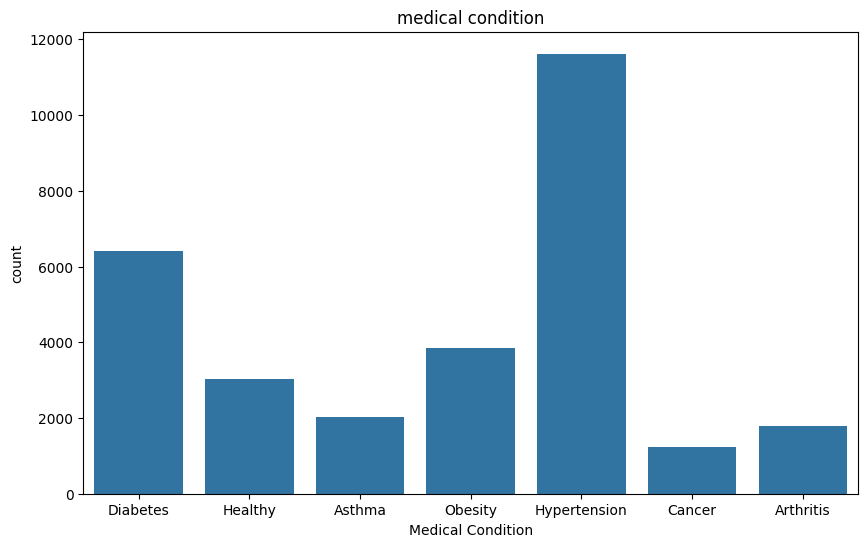

In [76]:
plt.figure(figsize=(10,6))
sns.countplot(x='Medical Condition', data=df)
plt.title("medical condition")
plt.show()

<Axes: xlabel='Sleep Hours', ylabel='Stress Level'>

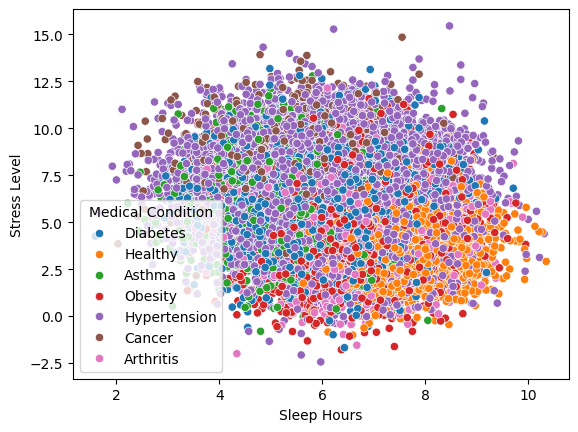

In [77]:
sns.scatterplot(x='Sleep Hours', y='Stress Level', hue='Medical Condition', data=df)

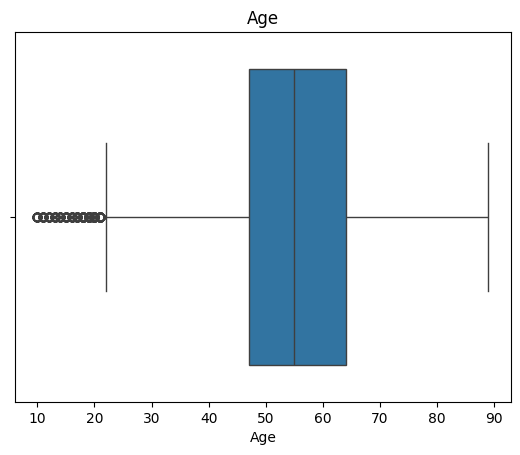

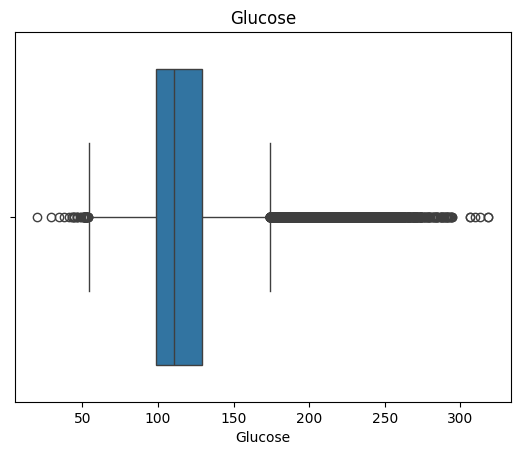

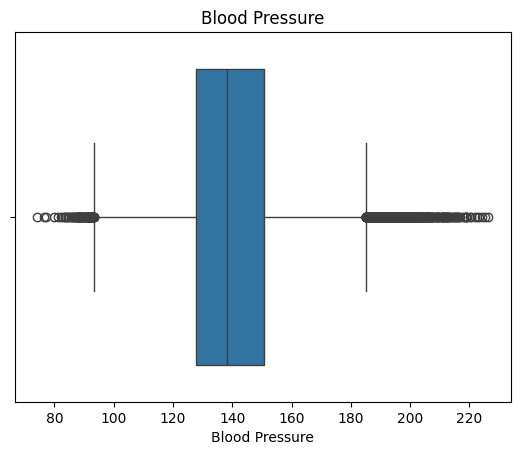

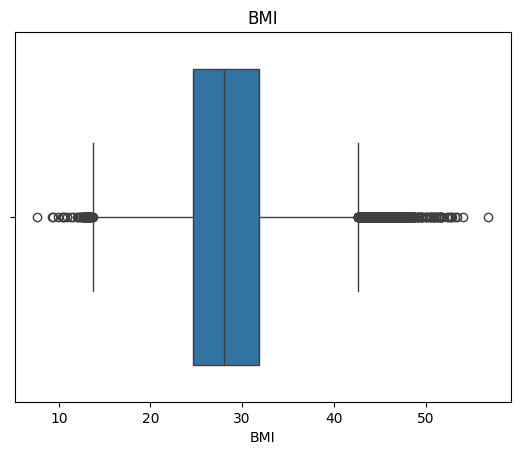

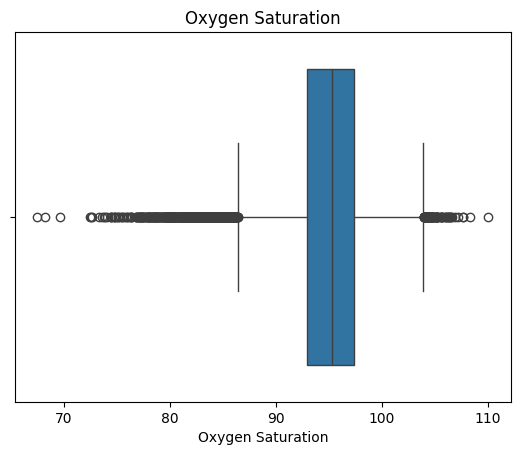

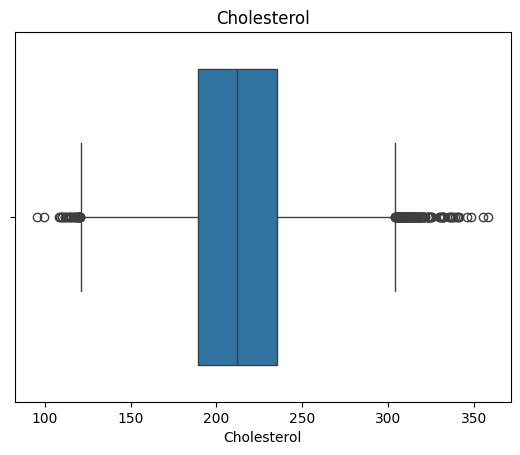

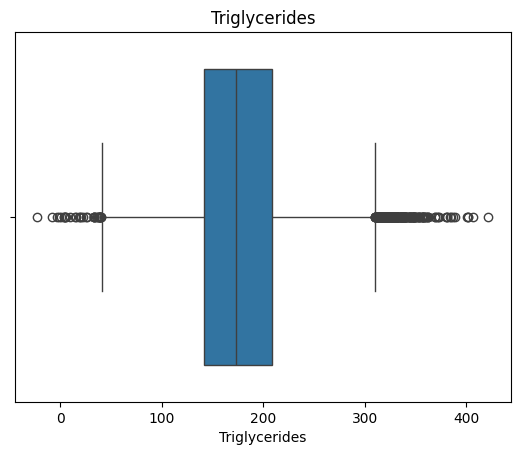

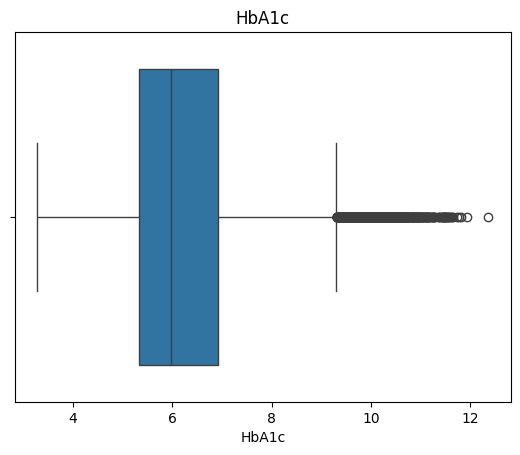

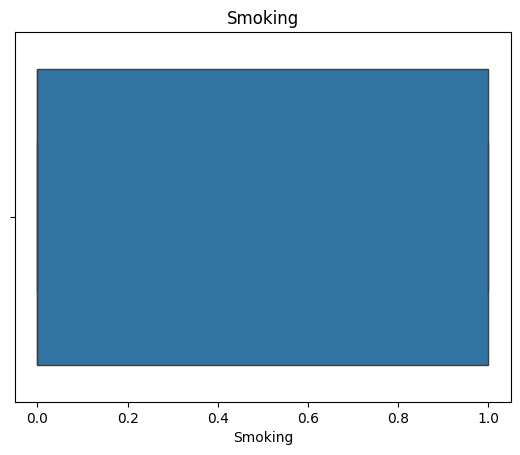

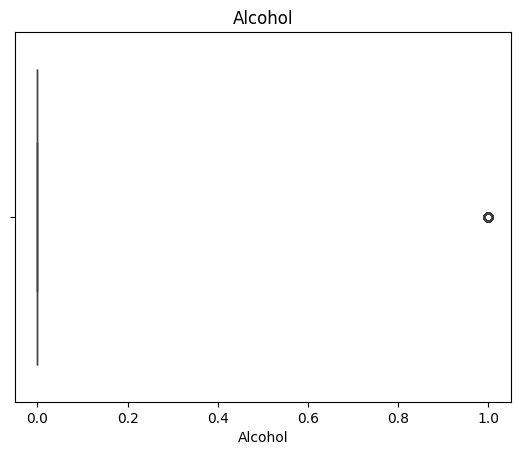

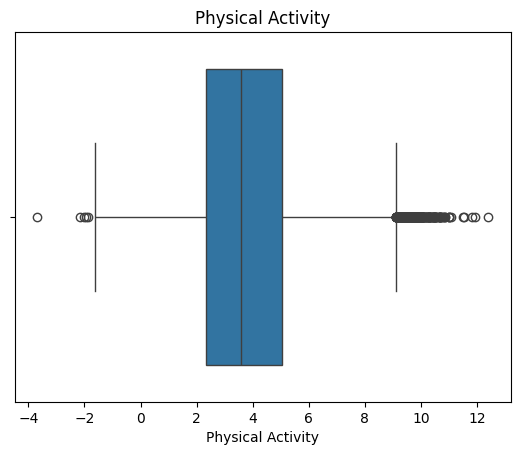

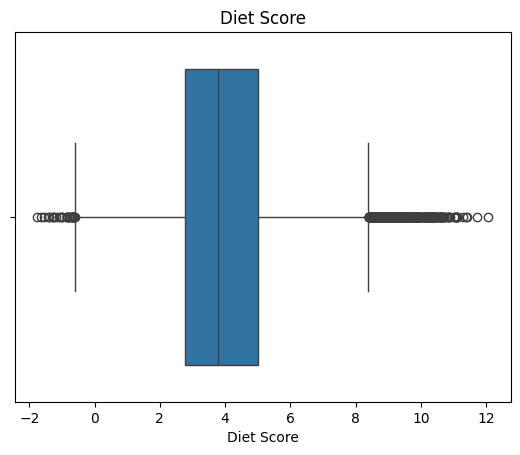

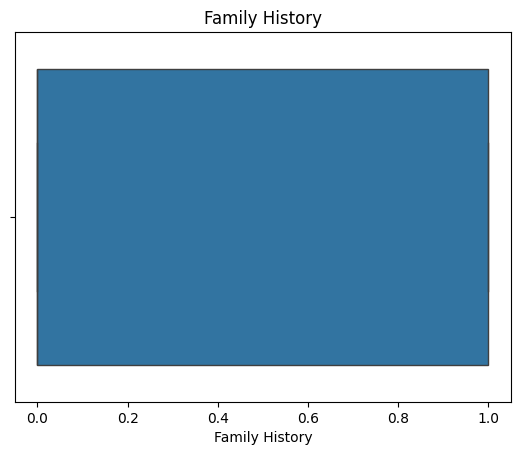

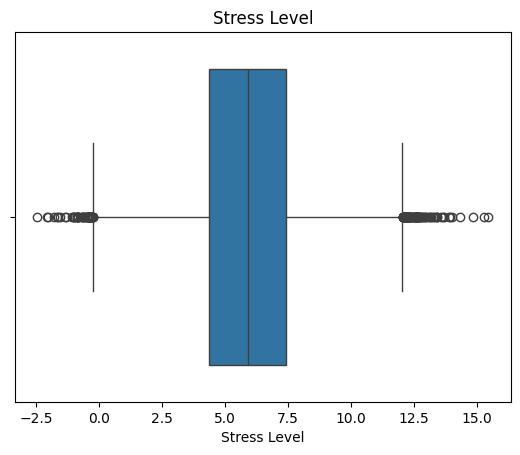

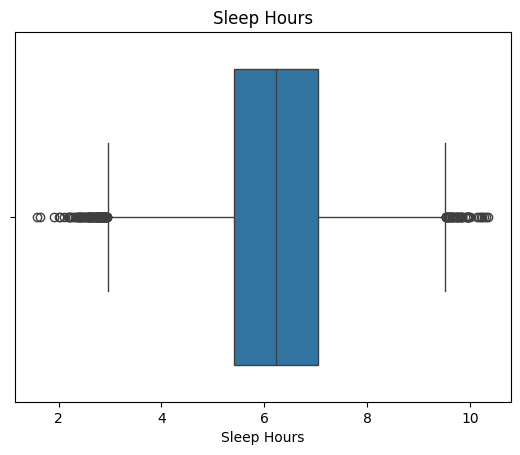

In [78]:
# Visualizing numerical columns — good for outlier detection.
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for num in numeric_cols:
    sns.boxplot(x=df[num])
    plt.title(f"{num}")
    plt.show()

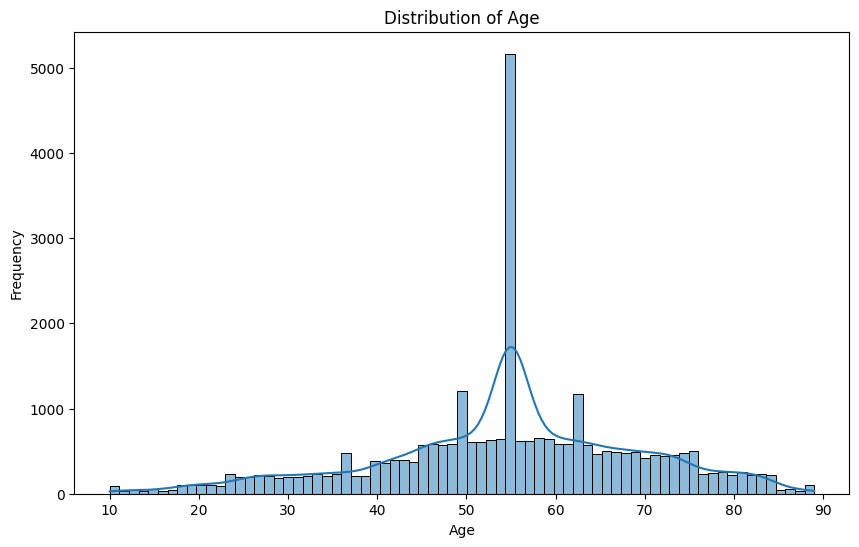

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

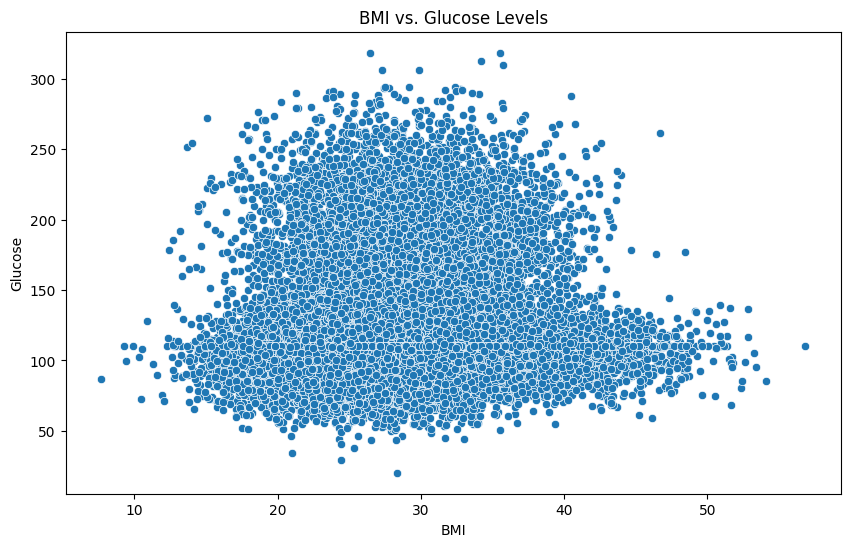

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BMI', y='Glucose', data=df)
plt.title('BMI vs. Glucose Levels')
plt.savefig('bmi_vs_glucose_scatterplot.png')



In [81]:
df1 = df.drop(['Medical Condition','Smoking','Family History'],axis=1)
df1.columns

Index(['Age', 'Glucose', 'Blood Pressure', 'BMI', 'Oxygen Saturation',
       'Cholesterol', 'Triglycerides', 'HbA1c', 'Alcohol', 'Physical Activity',
       'Diet Score', 'Stress Level', 'Sleep Hours'],
      dtype='object')

In [82]:
df1


,Age,Glucose,Blood Pressure,BMI,Oxygen Saturation,Cholesterol,Triglycerides,HbA1c,Alcohol,Physical Activity,Diet Score,Stress Level,Sleep Hours
0,46.0,137.04,135.27,28.90,96.04,231.88,210.56,7.61,0,-0.20,3.54,5.07,6.05
1,22.0,71.58,113.27,26.29,97.54,165.57,129.41,4.91,0,8.12,5.90,5.87,7.72
2,50.0,95.24,138.32,22.53,90.31,214.94,165.35,5.60,0,5.01,4.65,3.09,4.82
3,57.0,110.50,130.53,38.47,96.60,197.71,182.13,6.92,0,3.16,3.37,3.01,5.33
4,66.0,95.15,178.17,31.12,94.90,259.53,115.85,5.98,1,3.56,3.40,6.38,6.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,54.0,86.35,127.68,28.30,94.36,218.60,152.82,4.85,0,9.15,10.35,3.65,8.71
29996,41.0,89.24,154.37,24.93,96.07,198.30,176.81,5.36,0,3.34,3.40,6.72,2.81
29997,83.0,110.50,170.11,30.55,97.83,210.13,168.76,5.05,0,4.53,4.50,4.31,3.61
29998,41.0,242.87,152.97,23.57,99.17,208.86,224.21,7.59,0,3.16,2.59,7.10,5.80


In [83]:
# Remove outliers using IQR method
df_new = df1

for i in df1.select_dtypes(include=['float', 'int']).columns:
    q1 = df1[i].quantile(0.25)
    q3 = df1[i].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR

    df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]


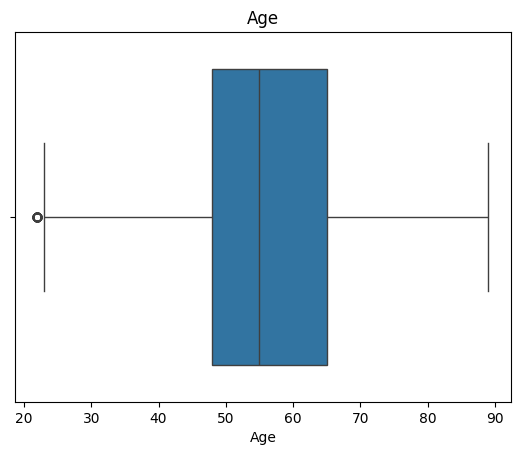

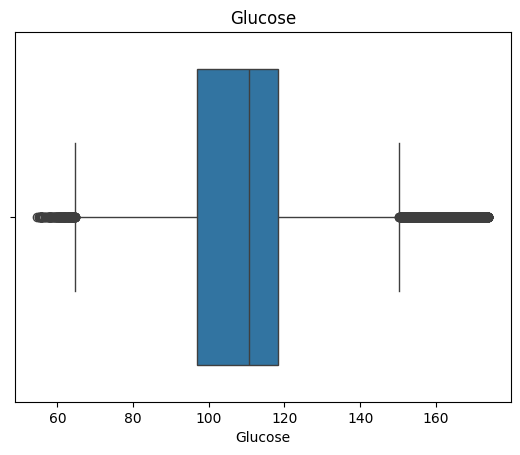

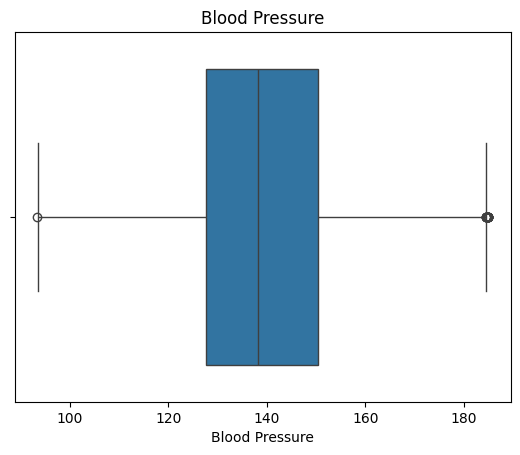

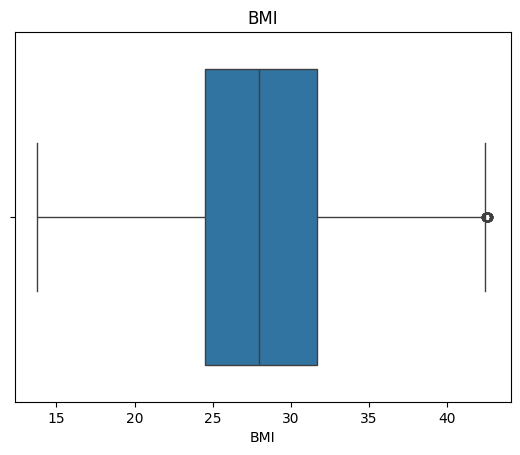

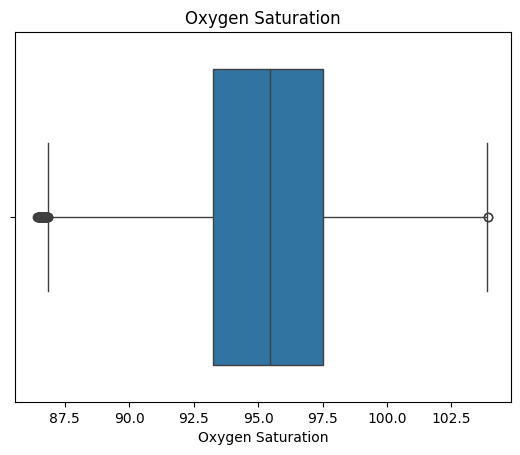

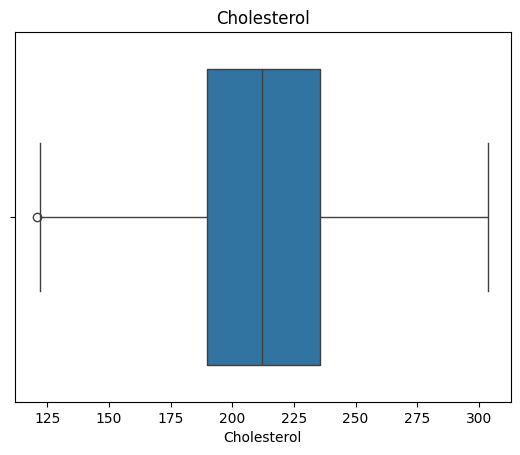

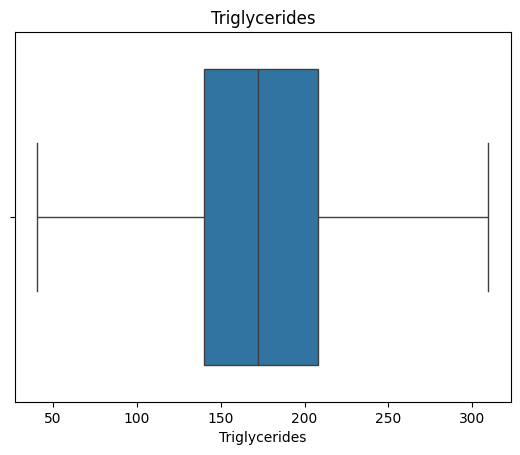

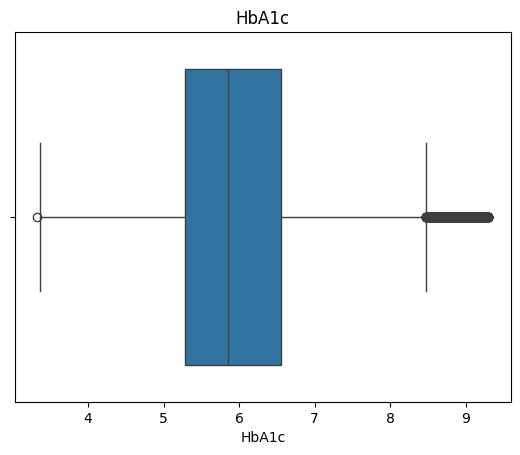

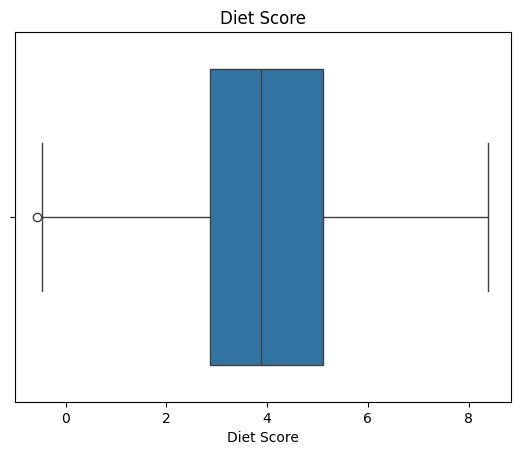

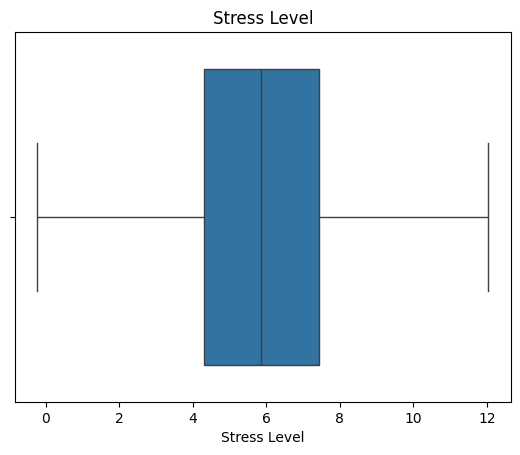

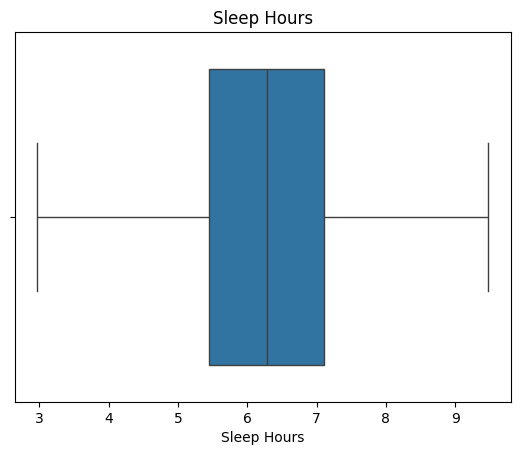

In [84]:
columns = ['Age','Glucose','Blood Pressure','BMI','Oxygen Saturation','Cholesterol','Triglycerides','HbA1c','Diet Score','Stress Level','Sleep Hours']
for num in columns:
    sns.boxplot(x=df[num])
    plt.title(f"{num}")
    plt.show()

In [85]:
print("Original shape:", df1.shape)
print("After removing outliers:", df_new.shape)

Original shape: (30000, 13)
After removing outliers: (30000, 13)


In [86]:
#  Checking data balance
df['Medical Condition'].value_counts()

Medical Condition
Hypertension    6749
Obesity         2228
Diabetes        2223
Healthy         1813
Arthritis       1392
Asthma           958
Cancer           746
Name: count, dtype: int64

<Axes: xlabel='Medical Condition', ylabel='count'>

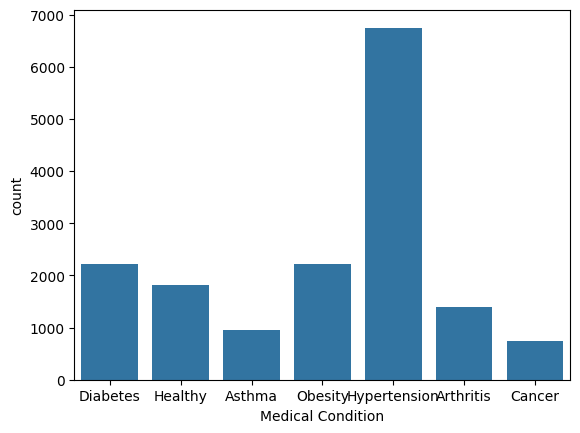

In [87]:
# Visualizing class imbalance.
sns.countplot(x='Medical Condition', data=df)

In [104]:
lab=LabelEncoder()
df['Medical Condition']=lab.fit_transform(df['Medical Condition'])

In [105]:
# Splitting features and target
x=df.drop('Medical Condition',axis=1)

In [103]:
y=df['Medical Condition']

In [91]:
df.reset_index()

,index,Age,Medical Condition,Glucose,Blood Pressure,BMI,Oxygen Saturation,Cholesterol,Triglycerides,HbA1c,Smoking,Alcohol,Physical Activity,Diet Score,Family History,Stress Level,Sleep Hours
0,0,46.0,3,137.04,135.27,28.90,96.04,231.88,210.56,7.61,0,0,-0.20,3.54,0,5.07,6.05
1,1,22.0,4,71.58,113.27,26.29,97.54,165.57,129.41,4.91,0,0,8.12,5.90,0,5.87,7.72
2,2,50.0,1,95.24,138.32,22.53,90.31,214.94,165.35,5.60,0,0,5.01,4.65,1,3.09,4.82
3,3,57.0,6,110.50,130.53,38.47,96.60,197.71,182.13,6.92,0,0,3.16,3.37,0,3.01,5.33
4,5,50.0,5,107.00,171.80,25.33,95.21,233.10,203.67,5.48,1,0,5.01,4.65,0,7.25,6.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16104,29990,43.0,3,110.50,132.31,19.80,94.04,190.63,146.06,7.93,0,0,4.13,3.73,1,3.75,6.90
16105,29993,48.0,5,107.09,163.32,34.40,94.47,236.15,181.37,5.43,0,0,4.43,4.93,1,7.55,3.72
16106,29994,76.0,5,97.17,138.92,25.65,93.99,235.65,238.26,6.43,0,0,3.14,3.46,0,6.66,6.10
16107,29997,83.0,5,110.50,170.11,30.55,97.83,210.13,168.76,5.05,0,0,4.53,4.50,0,4.31,3.61


In [92]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=10)
x_new = selector.fit_transform(x, y)
selected_features = x.columns[selector.get_support()]
print("Selected features:", selected_features)


Selected features: Index(['Age', 'Glucose', 'Blood Pressure', 'BMI', 'Cholesterol', 'HbA1c',
       'Physical Activity', 'Diet Score', 'Stress Level', 'Sleep Hours'],
      dtype='object')


In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.3,random_state=1)

In [94]:
#  Scaling numeric features — improves model performance.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [95]:
#  Model imports — multiple algorithms for comparison.

knn=KNeighborsClassifier()
svc=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
models=[knn,svc,dt,rf]
for model in models:
  print("*"*20,model,"*"*20)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print(classification_report(y_test,y_pred))




******************** KNeighborsClassifier() ********************
              precision    recall  f1-score   support

           0       0.50      0.57      0.53       416
           1       0.62      0.63      0.63       294
           2       0.31      0.19      0.24       206
           3       0.73      0.74      0.74       687
           4       0.79      0.95      0.86       503
           5       0.73      0.69      0.71      2038
           6       0.72      0.75      0.73       689

    accuracy                           0.70      4833
   macro avg       0.63      0.65      0.64      4833
weighted avg       0.69      0.70      0.69      4833

******************** SVC() ********************
              precision    recall  f1-score   support

           0       0.61      0.52      0.56       416
           1       0.69      0.68      0.69       294
           2       0.56      0.14      0.22       206
           3       0.76      0.81      0.79       687
           4       

In [96]:
print(y_pred)

[0 5 6 ... 5 5 1]


In [97]:
x_test.shape

(4833, 10)

In [101]:
import joblib
print("Saving the RandomForest model...")
joblib.dump(rf, 'best_rf_model.joblib')

print("Saving the scaler...")
joblib.dump(scaler, 'scaler.joblib')

print("Files saved successfully!")


Saving the RandomForest model...
Saving the scaler...
Files saved successfully!


In [99]:
x_test

array([[ 2.34258929e+00,  2.18292347e-02, -5.10200497e-01, ...,
        -6.22282249e-01, -4.39094570e-01, -6.37860107e-01],
       [ 2.22970965e-01,  2.18292347e-02,  1.04878050e+00, ...,
         3.74865036e-01,  1.54250038e+00, -6.29346809e-01],
       [-5.96448115e-02, -7.46502736e-02,  1.71958876e-01, ...,
        -1.73860985e-01, -1.41402115e+00,  1.44789781e+00],
       ...,
       [ 1.52317021e-01,  1.76913888e-03, -5.41186136e-02, ...,
         4.98770911e-01,  2.38139069e+00, -6.03806916e-01],
       [ 8.58856463e-01, -5.96212764e-01, -2.82440048e-01, ...,
         5.69574269e-01,  1.44727499e+00,  7.41294105e-01],
       [-1.04880003e+00,  2.18292347e-02, -1.57340098e-01, ...,
         3.74865036e-01,  1.10264978e+00, -6.74691670e-02]],
      shape=(4833, 10))